# Genesis4 Benchmark on Perlmutter (NERSC)

HPC systems often have special commands to invoke MPI jobs. NERSC uses slurm, which provides `srun` in place of `mpirun`.

In [1]:
from genesis.version4 import Genesis4
import os

The `MPI_RUN` class attribute needs to be replaced. For convenience, Genesis4 tries to detect NERSC:

In [2]:
Genesis4.MPI_RUN

'srun -n {nproc} --ntasks-per-node {nproc} -c 1 {command_mpi}'

Additionally, the working directory must be on the scratch disk. This is automatically detected:

In [13]:
Genesis4.WORKDIR

'/pscratch/sd/c/cmayes'

Create Genesis4 object:

In [14]:
FILE = 'data/basic4/cu_hxr.in'
G = Genesis4(FILE)

Set up the benchmark

In [6]:
G.input['main'][6]['zstop'] = 40

Run with MPI

In [7]:
%%time
G.verbose=False
G.nproc = 8
G.run()

CPU times: user 37.1 ms, sys: 51.8 ms, total: 88.9 ms
Wall time: 1min 33s


# Timing

In [8]:
MAX_CPUS = os.cpu_count()
MAX_CPUS

256

In [9]:
import time
def time1(nproc):
    t1 = time.time()
    G.verbose=False
    G.nproc = nproc
    G.run()
    dt = time.time() - t1
    return dt

#time1(MAX_CPUS)

In [10]:
%%time
nlist = []
tlist = []
n_cpu = MAX_CPUS
while n_cpu > 0:
    n = n_cpu
    nlist.append(n)
    dt = time1(n)
    tlist.append(dt)
    print(f'{n} cores, {dt:0.1f} s')
    n_cpu = n_cpu //2

256 cores, 12.4 s
128 cores, 9.3 s
64 cores, 15.6 s
32 cores, 27.7 s
16 cores, 49.1 s
8 cores, 113.3 s
4 cores, 184.2 s
2 cores, 367.4 s
1 cores, 555.5 s
CPU times: user 311 ms, sys: 505 ms, total: 815 ms
Wall time: 22min 14s


In [11]:
nlist, tlist

([256, 128, 64, 32, 16, 8, 4, 2, 1],
 [12.407618761062622,
  9.337806940078735,
  15.55810832977295,
  27.734387397766113,
  49.104663372039795,
  113.33639931678772,
  184.2123155593872,
  367.3742334842682,
  555.4603695869446])

# Some saved stats

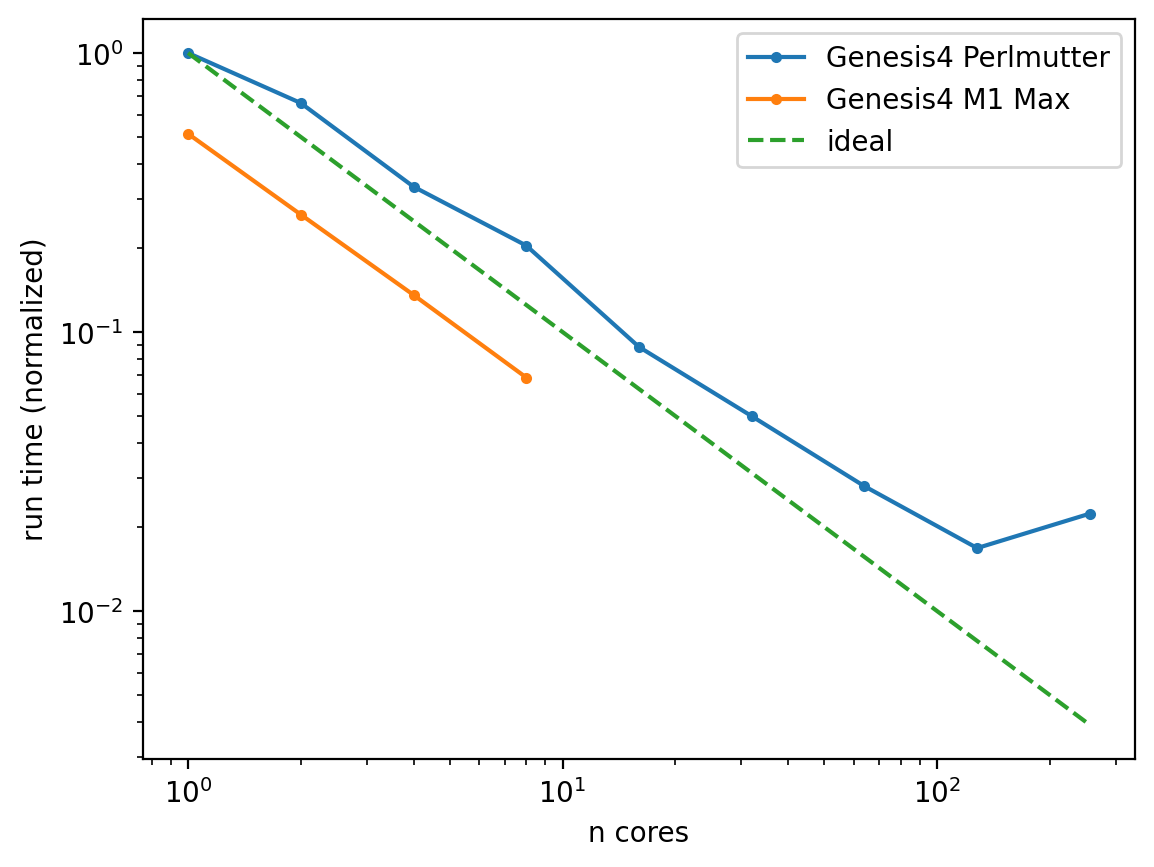

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Perlmutter
nlist, tlist =([256, 128, 64, 32, 16, 8, 4, 2, 1],
 [12.407618761062622,
  9.337806940078735,
  15.55810832977295,
  27.734387397766113,
  49.104663372039795,
  113.33639931678772,
  184.2123155593872,
  367.3742334842682,
  555.4603695869446])
nlist = np.array(nlist)[::-1]
tlist = np.array(tlist)[::-1]

tref = tlist[0]

# M1 Max 
nlistmac, tlistmac =([8, 4, 2, 1],
 [38.151074171066284,
  75.41113114356995,
  146.3512842655182,
  285.11587405204773])
nlistmac = np.array(nlistmac)
tlistmac = np.array(tlistmac)



plt.plot(nlist, tlist/tref, marker='.', label='Genesis4 Perlmutter')
plt.plot(nlistmac, tlistmac/tref,  marker='.', label='Genesis4 M1 Max')
plt.plot(nlist,  1/(nlist/nlist[0]), '--', label='ideal')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n cores')
plt.ylabel('run time (normalized)')
plt.legend()